In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(
    0, '/home/khayatan/xl_vlms_cvpr/xl-vlms/src'
)

results_dir = '/home/khayatan/xl_vlms_cvpr/xl-vlms/results/'
steering_results_dir = '/home/khayatan/xl_vlms_cvpr/xl-vlms/results/steering/'
features_results_dir = '/home/khayatan/xl_vlms_cvpr/xl-vlms/results/features/'



In [3]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import argparse
from IPython.display import display
import pandas as pd
from sklearn.cluster import KMeans
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")



from utils import csv_print, plot_shift_results, MinimalCOCODataset

In [4]:
steering_method = "shift_of_means"
model = "llava"
layer = "31"
steering_hook_name = "steering_vector_shift_hidden_states_add"
data_dir = "/data/mshukor/data/coco/"
annotation_file = "karpathy/dataset_coco.json"

## Fine-grained steering for VQA
#### yes => no
#### 1 => 3
#### white => black
[The scripts to run before the folllowing visualizations](../src/examples/steering/vqa)


baseline


,yes/no,number,other,unrecognized
,1861,687,2349,103


yes_to_no


,yes/no,number,other,unrecognized
,1885,694,2294,127


1_to_3


,yes/no,number,other,unrecognized
,1859,670,2349,122


white_to_black


,yes/no,number,other,unrecognized
,1862,671,2311,156



Baseline:


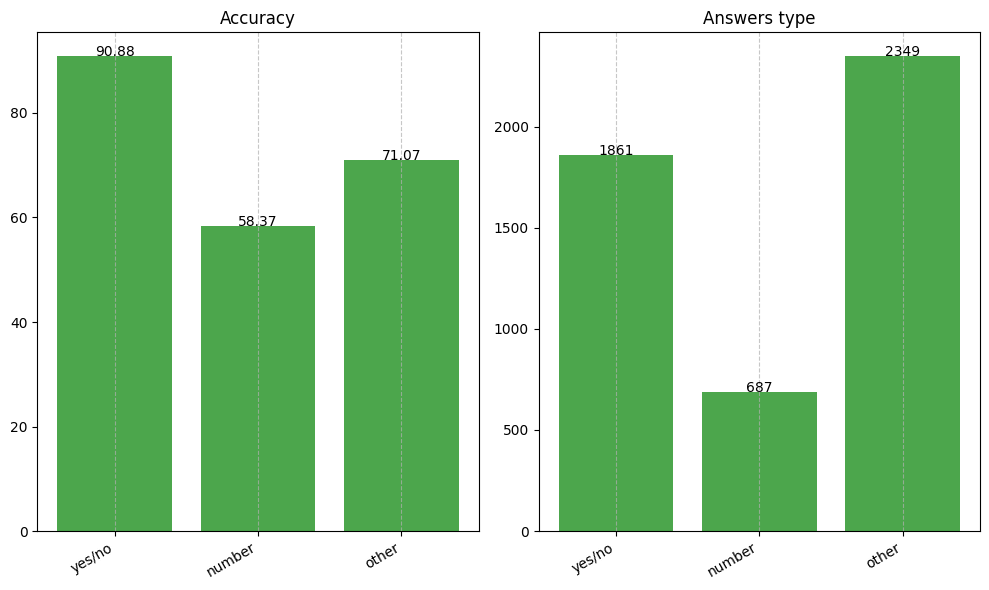


yes_no /home/khayatan/xl_vlms_cvpr/xl-vlms/results/steering/vqav2_accuracy_shift_of_means_llava_31_yes_to_no_steering_vector_shift_hidden_states_add.json:
main_answers: ['No'] counts_difference_to_main: 1704:
Overall: main_answers: ['2', '1'] counts_difference_to_main: 33:


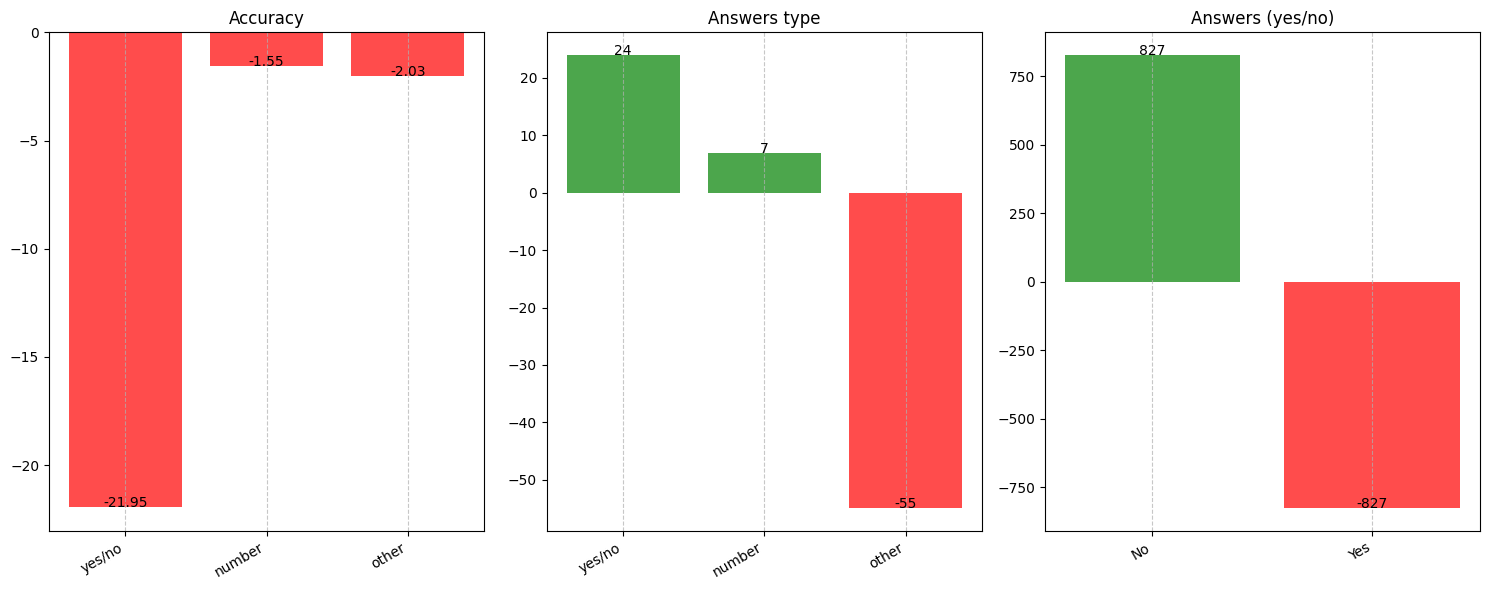


number /home/khayatan/xl_vlms_cvpr/xl-vlms/results/steering/vqav2_accuracy_shift_of_means_llava_31_1_to_3_steering_vector_shift_hidden_states_add.json:
main_answers: ['2', '3'] counts_difference_to_main: 69:
Overall: main_answers: ['2', '3'] counts_difference_to_main: 33:


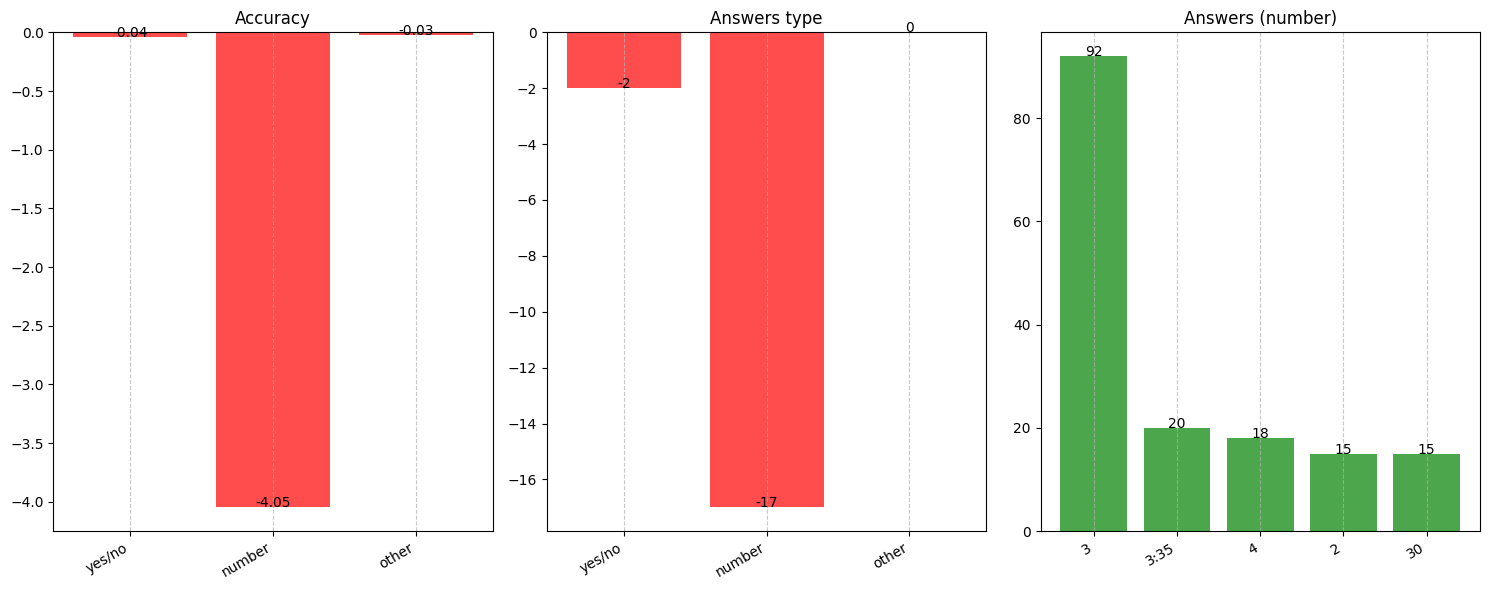


other /home/khayatan/xl_vlms_cvpr/xl-vlms/results/steering/vqav2_accuracy_shift_of_means_llava_31_white_to_black_steering_vector_shift_hidden_states_add.json:
main_answers: ['Black'] counts_difference_to_main: 351:
Overall: main_answers: ['2', '1'] counts_difference_to_main: 104:


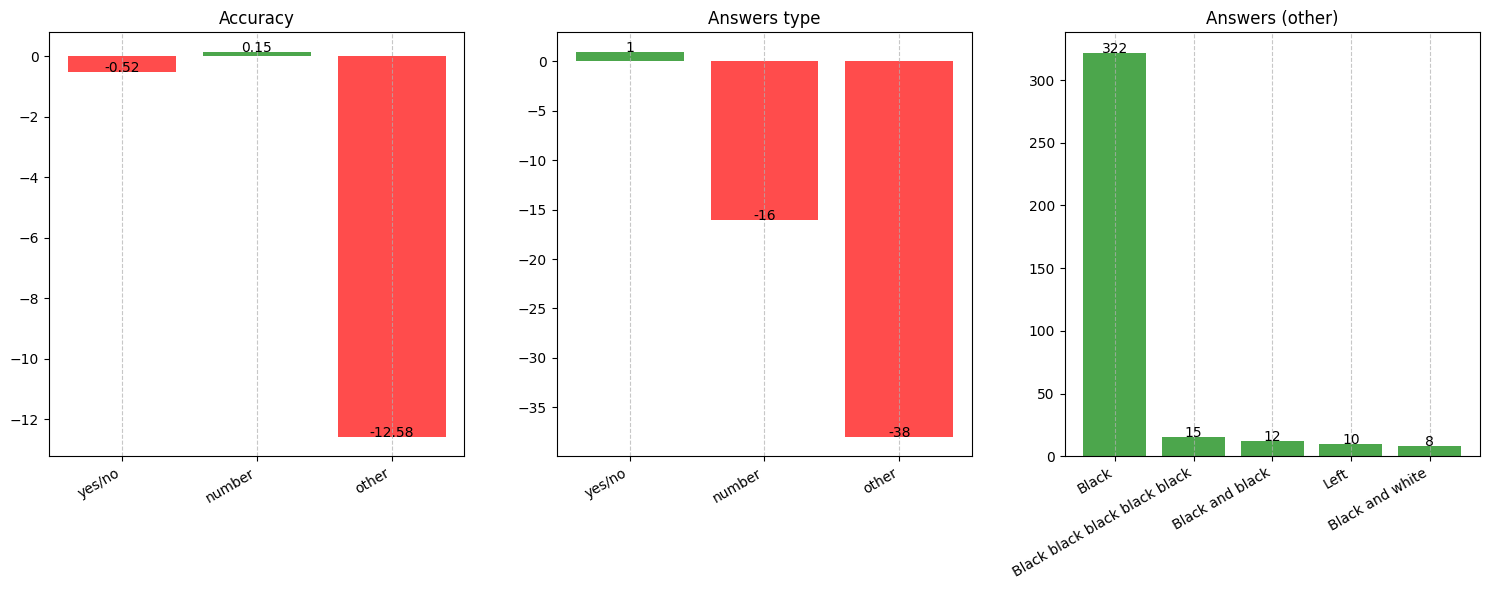

In [5]:
save_filenames = ["yes_to_no", "1_to_3", "white_to_black"]
keys_answer_type = ['yes/no', 'number', 'other', 'unrecognized']
score_keys = {
    'yes_no': 'yes/no', 
    'number': 'number', 
    'other': 'other'
}


reference_dict_path = os.path.join(steering_results_dir, f"vqav2_accuracy_llava_vqav2_val_baseline_datasize_5000.json")
results = json.load(open(reference_dict_path))['answer_types_count']
print('baseline')
csv_print(results, keys=keys_answer_type)


results_paths = []
answer_types = ['yes_no', 'number', 'other']
for k, save_filename in enumerate(save_filenames):
    shift_vector_key = f"steering_vector"
    results_path = os.path.join(steering_results_dir, f"vqav2_accuracy_{steering_method}_{model}_{layer}_{save_filename}_{steering_hook_name}.json")
    results_paths.append(results_path)
    
    results = json.load(open(results_path))['answer_types_count']

    print(save_filename)
    csv_print(results, keys=keys_answer_type)


print_keys = ['accuracy']
plot_shift_results(results_paths=results_paths, results_paths_dict={}, reference_dict_path=reference_dict_path, keys_answer_type=['yes/no', 'number', 'other'], print_keys=print_keys, score_keys=score_keys, answer_types=answer_types)



## Style steering for captioning

#### steer the model to generate captions that are sentiment-related

[The scripts to run before the folllowing visualizations](../src/examples/steering/captioning)

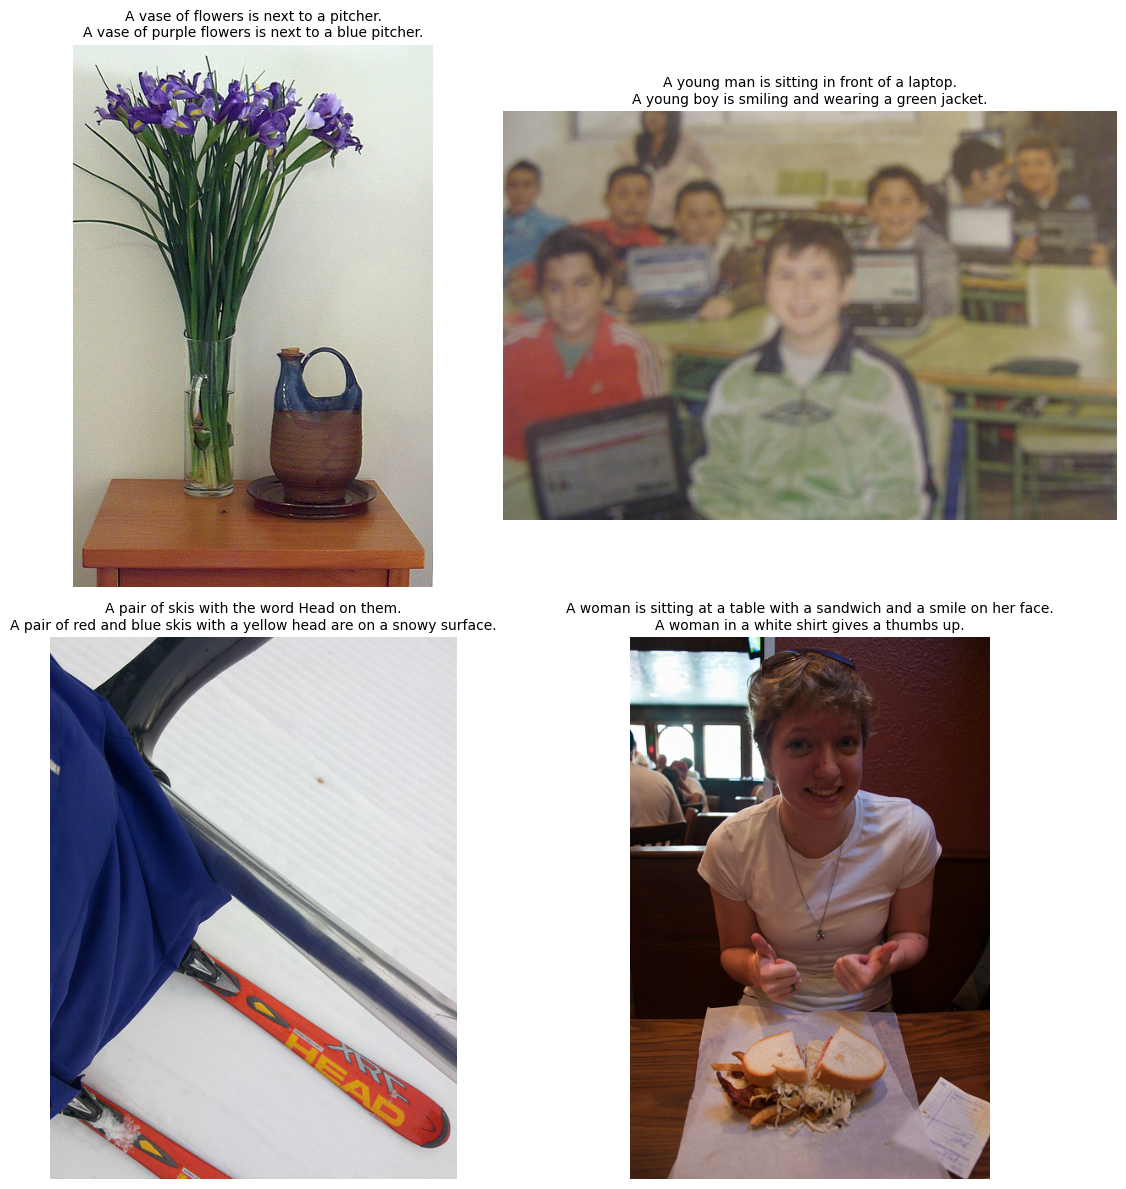

In [6]:
dataset = MinimalCOCODataset(
    annotation_file=annotation_file,
    data_dir=data_dir,
    split="val",
    dataset_size=50,
    seed=0,
)


def visualize_images_with_captions(dataset, indices, captions_1, captions_2, split="val", source="val2014"):
    num_images = len(indices)
    num_columns = 2
    num_rows = (num_images + num_columns - 1) // num_columns

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 6))
    axs = axs.flatten()

    for i, idx in enumerate(indices):
        image = dataset[idx]["image"]
        
        axs[i].imshow(image)
        axs[i].axis("off")
        
        caption1, caption2 = captions_1[idx][0], captions_2[idx][0]
        axs[i].set_title(f"{caption1}\n{caption2}", fontsize=10, loc="center", color="black")

    # Hide any unused axes
    for i in range(num_images, len(axs)):
        axs[i].axis("off")

    plt.tight_layout()
    plt.show()


indices = [0, 40, 16, 15]

original_dict = torch.load(os.path.join(features_results_dir, 'save_hidden_states_before_special_tokens_val_llava_coco_19_class_all.pth'))
captions_original = original_dict['model_predictions']
steered_dict = torch.load(os.path.join(features_results_dir, 'save_hidden_states_shift_hidden_states_add_shift_of_means_llava_coco_19_class_all_to_colors_onlytoi_steering_vector_save_hidden_states_shift_hidden_states_add.pth'))
captions_steered = steered_dict['model_predictions']

visualize_images_with_captions(dataset, indices, captions_original, captions_steered)




